# 6.2 Table of Contents - Hospital Homeless Encounters with Visualizations

#### 1. Importing libraries and data
#### 2. Create subset of data that is just homeless encounters
#### 3. Data Cleaning
#### 4. Creating subsets for further exploration
#### 5. Exploring Relationships
    - Correlation
        - Correlation Matrix
        - Correlation Heatmap
    - Scatterplots
    - Pair Plots
    - Categorical Plots
#### 6.  Analysis Questions: 
 
  - **What?** 
  
       - What department are the homeless more likely to end up in?  Emergency or Inpatient Hospitalization
       - What age group is most likely to end up in the hospital   
     
  - **Where?**
  
       - Where are the counties that have the most homeless encounters?
           - What are the top 5 counties? 
       - Where in the hospital are these encounters happening the most (Emergency Room or Inpatient Hospitalization)
       - In the top 5 counties where there are the highest homeless encounters, is this in an area where there is a Primary or Mental Health shortage? 
  - **How?**
       - How do demographics take into account for visits?  
         - Age
         - Race
         - Sex
         - Payer

#### 7.  Extra section (This part is exploratory to see how to create dummy variables for categorical data and the correlation heatmap).
#### 8. Hypothesis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [2]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.1_Cleaning_and_Desc_Statistics.csv', index_col=False)

## 2. Subset for Homeless Encounters only

In [4]:
# creating subset for only the homeless population

df2 = df[(df['HomelessIndicator'] == 'Homeless')]

In [5]:
# checking output
df2['HomelessIndicator'].value_counts()

Homeless    12478
Name: HomelessIndicator, dtype: int64

In [6]:
df2.isnull().sum()

Unnamed: 0                     0
EncounterType                  0
HospitalCounty                 0
FacilityName                   0
System                      4216
Ownership                      0
Urban_Rural                    0
Teaching                       0
LicensedBedSize                0
PrimaryCareShortageArea        0
MentalHealthShortageArea       0
HomelessIndicator              0
Demographic                    0
DemographicValue               0
Homeless_Pop                   0
TotalEncounters                0
Percent                        0
Non_Homeless_Population        0
dtype: int64

- These nulls are okay as they may not be part of a major hospital system with additional locations. 

## 3. Viewing and cleaning dataframe

In [7]:
# checking rows and columns of original dataset
df.shape

(25449, 18)

In [8]:
# checking columns, counts, datatypes, and overall dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12478 entries, 0 to 25297
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12478 non-null  int64  
 1   EncounterType             12478 non-null  object 
 2   HospitalCounty            12478 non-null  object 
 3   FacilityName              12478 non-null  object 
 4   System                    8262 non-null   object 
 5   Ownership                 12478 non-null  object 
 6   Urban_Rural               12478 non-null  object 
 7   Teaching                  12478 non-null  object 
 8   LicensedBedSize           12478 non-null  object 
 9   PrimaryCareShortageArea   12478 non-null  object 
 10  MentalHealthShortageArea  12478 non-null  object 
 11  HomelessIndicator         12478 non-null  object 
 12  Demographic               12478 non-null  object 
 13  DemographicValue          12478 non-null  object 
 14  Homele

In [9]:
# checking rows and columns in Homeless subset
df2.shape

(12478, 18)

In [10]:
# removing unnecessary column
df2= df2.drop(columns = ['Unnamed: 0'])

In [11]:
# verifying removal was successful
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12478 entries, 0 to 25297
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EncounterType             12478 non-null  object 
 1   HospitalCounty            12478 non-null  object 
 2   FacilityName              12478 non-null  object 
 3   System                    8262 non-null   object 
 4   Ownership                 12478 non-null  object 
 5   Urban_Rural               12478 non-null  object 
 6   Teaching                  12478 non-null  object 
 7   LicensedBedSize           12478 non-null  object 
 8   PrimaryCareShortageArea   12478 non-null  object 
 9   MentalHealthShortageArea  12478 non-null  object 
 10  HomelessIndicator         12478 non-null  object 
 11  Demographic               12478 non-null  object 
 12  DemographicValue          12478 non-null  object 
 13  Homeless_Pop              12478 non-null  int64  
 14  TotalE

## 4. Creating subsets for further exploration
** Sub set dataframes to breakdown demographic values to better answer questions ** 

In [12]:
# subset for Age Ranges
Ages = df2[df2['Demographic'] == 'Age']

In [13]:
# subset for Payer
Payer = df2[df2['Demographic'] == 'Payer']

In [14]:
# subset for Age Ranges
Race = df2[df2['Demographic'] == 'Race']

In [15]:
# subset for Sex
Gender = df2[df2['Demographic'] == 'Sex']

## 5. Exploring Relationships

#### 5a Correlations

  #### Correlation Matrix
 

In [16]:
# creating subset for correlation matrix to remove categorical and only have necessary columns
df2_sub = df2[['Homeless_Pop', 'Non_Homeless_Population', 'TotalEncounters']]

In [17]:
# create correlation matrix from subset of main dataframe 
df2_sub.corr()

,Homeless_Pop,Non_Homeless_Population,TotalEncounters
Homeless_Pop,1.000000,0.393867,0.669604
Non_Homeless_Population,0.393867,1.000000,0.946418
TotalEncounters,0.669604,0.946418,1.000000


 #### Correlation Heatmatrix


In [18]:
# creating a heatmap in seaborn
# creating subset to remove unnamed column
sub_corrmatrix = df2[['Homeless_Pop', 'Non_Homeless_Population', 'TotalEncounters']]

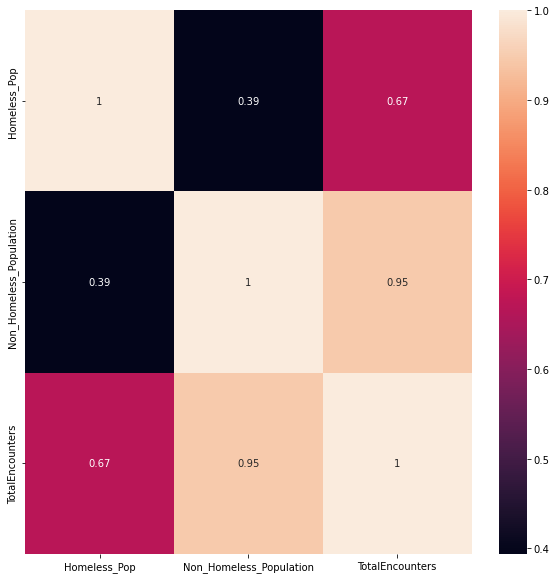

In [19]:
# create a heatmatrix in seaborn
# creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df2_sub.corr(), annot=True, ax=ax)

-- There is a strong positive relationship (.67) between the Homeless Population and Total Encounters.  This is to be expected as the the Homeless Population is part of Total Encounters.  Total Encounters = (Homeless_Pop + Non_Homeless_Population).

-- There is a positive moderate relationship between (.39) the Non_Homeless and Homeless_Population.  

-- There is a very strong positive relationship between Non_Homeless and Total Encounters.  This again is to be expected as the majority of the encounters are Non_Homeless.  


#### 5b. Scatterplots

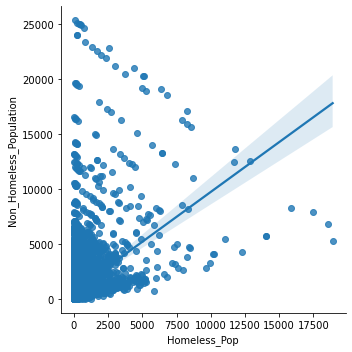

In [20]:
# creating a scatterplot between the homeless population and non homeless to see correlation
sns.lmplot(x='Homeless_Pop', y='Non_Homeless_Population', data = df2)

- We can see that there is a mild positive correlation between Non Homeless and Homeless.  Once you hit about 7500 for the non-homeless popluation cases start to drop off.  This is the same for the homeless population however it's at about 5000 instead of 7500.  

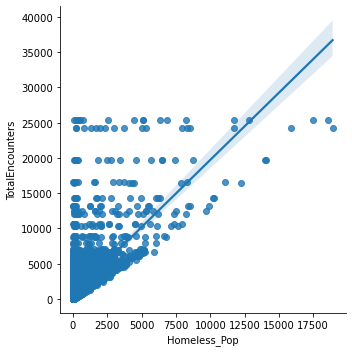

In [21]:
# creating a scatterplot between the homeless population and total population
sns.lmplot(x='Homeless_Pop', y='TotalEncounters', data = df2)

- Comparing the homeless population to the total population has the same curve where the bulk of the encounters are about 9000 for total encounters and 5000 for homeless.  After that as the numbers get larger the spread gets more sporadic. 

#### 5c. Pair Plots

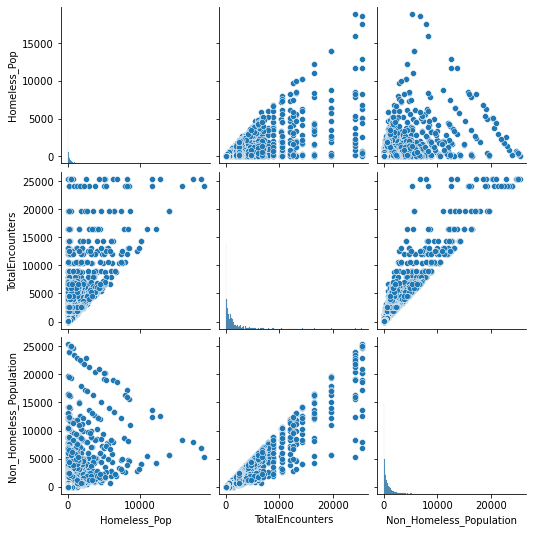

In [22]:
# keeping only the variables needed in pair plot
sub_pair = df2[['Homeless_Pop', 'TotalEncounters','Non_Homeless_Population']]
g=sns.pairplot(sub_pair)

- We can see that hospital visits for the homeless population decrease the more encounters you have.  The majority of the homeless visits are in the lower counts. As the total encounters or populations increases the fewer homeless visits there are. 

#### 5d. Categorical Plots

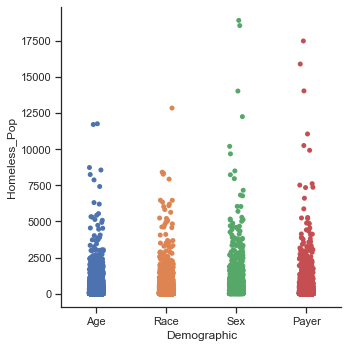

In [23]:
# seeing if there is a difference amongst demographic and the homeless population
sns.set(style='ticks')
g = sns.catplot(x='Demographic', y="Homeless_Pop", data = df2)

- Out of the 4 demographics it looks like Sex and Payer Type have the most homeless encounters. 

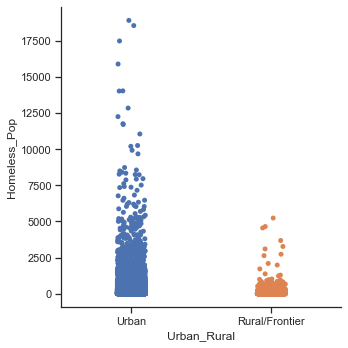

In [24]:
sns.set(style='ticks')
g = sns.catplot(x='Urban_Rural', y="Homeless_Pop", data = df2)

- There are many more homeless visits in an urban hospital compared to a rural hospital. 

# 6. Analysis Questions

#### 6a. Are there certain counties that are hit harder with homeless encounters? 

In [25]:
# creating a new dataframe with Hospital County only so that we can aggregate the homeless visits to each county

df3 = df2[['HospitalCounty']].copy()

In [26]:
df3.head()

,HospitalCounty
0,Alameda
1,Alameda
2,Alameda
3,Alameda
4,Alameda


In [27]:
# dropping duplicates
df3 = df3.drop_duplicates()

In [28]:
df3.head()

,HospitalCounty
0,Alameda
12,Lake
80,Butte
104,Contra Costa
140,El Dorado


In [29]:
# creating new column 'CountySum' to group HospitalCounty and aggregating the sum of Homeless Population
df3['CountySum'] = df2.groupby(['HospitalCounty',])['Homeless_Pop'].transform(np.sum)

In [30]:
df3.head()

,HospitalCounty,CountySum
0,Alameda,187970
12,Lake,4252
80,Butte,30326
104,Contra Costa,57598
140,El Dorado,6391


In [31]:
# grouping by County Sum
df3[['HospitalCounty', 'CountySum']].groupby(['CountySum']).value_counts().sort_values(ascending = False)

CountySum  HospitalCounty 
44         Glenn              1
68         Mono               1
25220      Tulare             1
29958      Humboldt           1
30326      Butte              1
30757      Yuba               1
32707      Santa Cruz         1
34568      Monterey           1
34699      Solano             1
39389      Santa Barbara      1
43189      San Mateo          1
44407      Shasta             1
44604      Ventura            1
53807      Kern               1
55851      San Joaquin        1
56155      Sonoma             1
57598      Contra Costa       1
61779      Stanislaus         1
91245      Santa Clara        1
96053      Fresno             1
121118     Riverside          1
168301     San Bernardino     1
177751     Sacramento         1
187970     Alameda            1
207906     Orange             1
265358     San Francisco      1
399156     San Diego          1
18144      Placer             1
16467      San Luis Obispo    1
13281      Merced             1
3036       Tu

In [32]:
# Sorting Hospital Counties by the County Sum. 
# this is going to show us the total homeless visits in that county.  
# example Glenn County has had fewest with 44 homesless encounters and LA County the most with 1054177

print(df3.iloc[df3.sum(axis=1).argsort()])

        HospitalCounty  CountySum
7328             Glenn         44
11057             Mono         68
5887            Plumas         76
12168            Modoc        148
12815             Inyo        200
4565            Colusa        208
11431        Calaveras        392
8568          Mariposa        392
24575          Trinity        408
12741           Sutter        408
2460            Lassen        828
20255           Amador       1748
7881        San Benito       2200
920           Tuolumne       3036
6590          Siskiyou       3292
21125        Del Norte       3864
776             Nevada       4040
12                Lake       4252
692             Madera       5208
264              Kings       5212
15234           Tehama       5784
140          El Dorado       6391
200           Imperial       7540
184          Mendocino       8088
700              Marin       8227
768               Napa       9641
1664              Yolo      10084
736             Merced      13281
1352   San Lui

C:\Users\there\AppData\Local\Temp\ipykernel_19508\279216109.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df3.iloc[df3.sum(axis=1).argsort()])


#### 6b.  What are the top 5 counties? 

In [33]:
# obtaining the 5 highest counties with homeless encounters. 
df3.sort_values(by=['CountySum']).tail(5)

,HospitalCounty,CountySum
0,Alameda,187970
784,Orange,207906
1260,San Francisco,265358
1164,San Diego,399156
280,Los Angeles,1054177


- With the exception of San Fran and Alameda County the counties with the highest homeless encounters are in Southern California.  The top 3 counties are Los Angeles, San Diego, and San Fransisco

#### 6c.  Within the top 5 counties, are these in areas where there nursing shortages either Primary Care or Mental Health? 

In [34]:
# creating a subset of top 5 counties
Top5 = df2[df2.HospitalCounty.isin(["Los Angeles", "San Diego", "San Fransisco", "Orange", "Alameda"])]

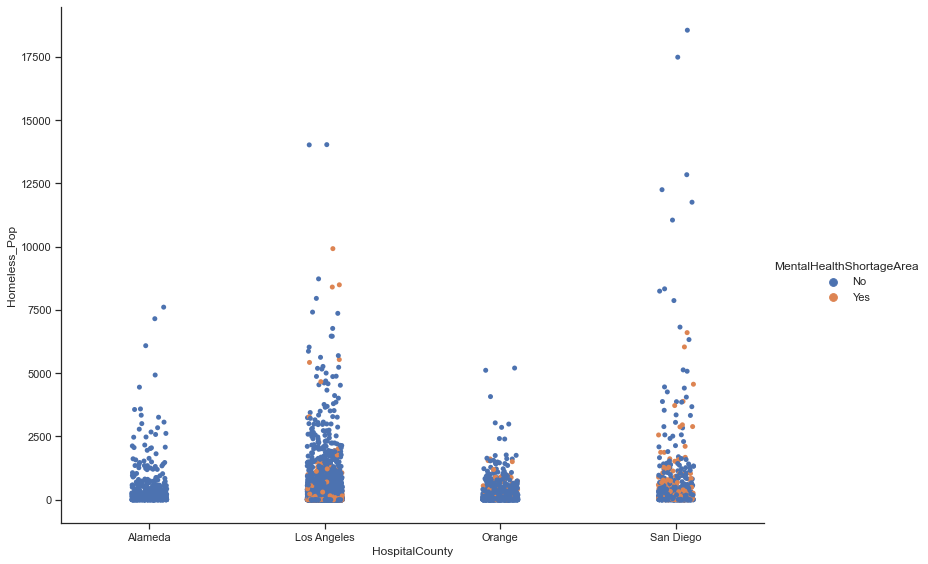

In [35]:
# creating plot to see relationship between mental health shortage and top 5 counties of homeless visits
sns.set(style='ticks')
Top5_mentalhealth = sns.catplot(x='HospitalCounty', y="Homeless_Pop", hue = 'MentalHealthShortageArea', data = Top5, height = 8, aspect=11/8)

- Los Angeles and San Diego have the highest Mental Health Shortage Area out of the top 5.  Alameda doesn't have any mental health shortage area, and Orange county has some. 

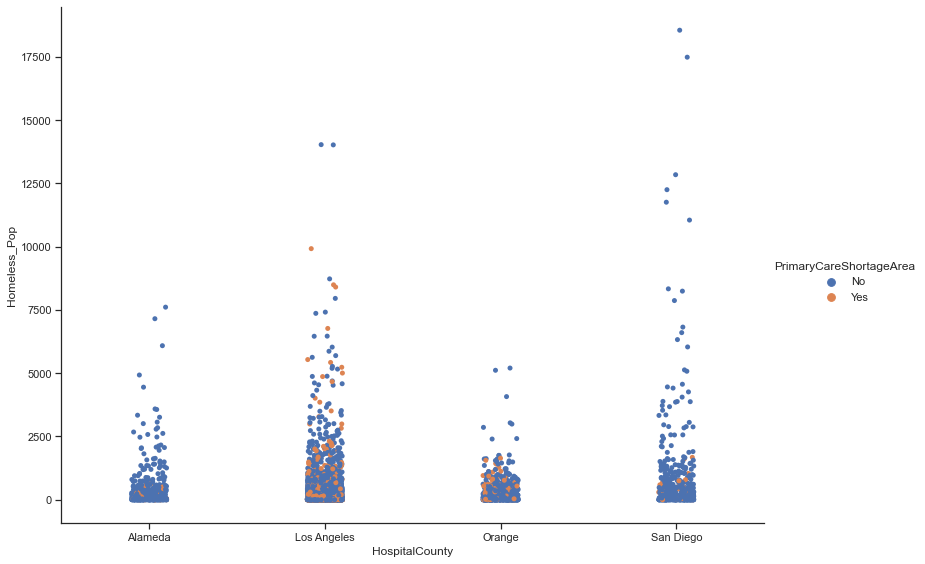

In [36]:
# creating plot to see relationship between primary care shortage and homeless visits
sns.set(style='ticks')
Top5_primaryhealth = sns.catplot(x='HospitalCounty', y="Homeless_Pop", hue = 'PrimaryCareShortageArea', data = Top5, height = 8, aspect=11/8)

- Los Angeles County is hit the hardest out of the top 5 for being in the Primary Care Shortage Area, followed by Orange County. 

- As opposed to no mental health shortage in Alameda, there is a small Primary Care shortage in that county.  

#### 6d. Where are the homeless more likely to go for care (The Emergency Department or Inpatient Hospitalization)?

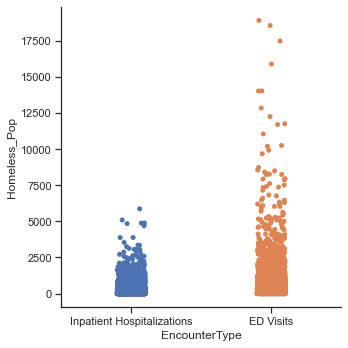

In [37]:
# location of visits
sns.set(style='ticks')
location = sns.catplot(x='EncounterType', y="Homeless_Pop", data = df2)

The homeless are more likely to have an Emergency Room visits compared to Inpatient Hospitalizations

#### 6e.  What is the location of visits by gender?

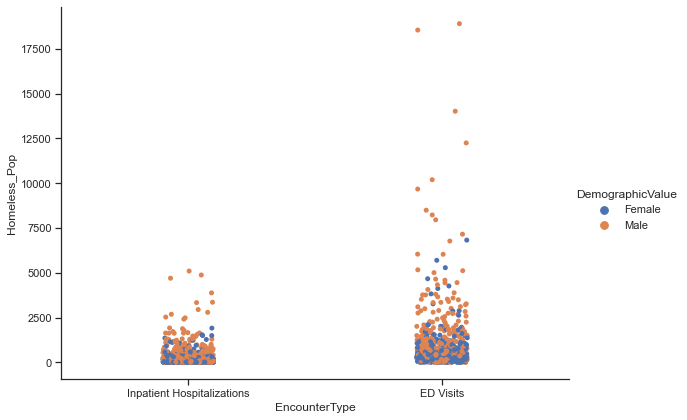

In [38]:
# location of visits by gender
sns.set(style='ticks')
location = sns.catplot(x='EncounterType', y="Homeless_Pop", hue = 'DemographicValue', data = Gender, height = 6, aspect = 11/8)

- Breaking down the visits for the Emergency Department and InPatient Hospitalization, we can see that men are more likely to go to Inptatient as well as ED. 

#### 6f. Do certain demographics have higher more visits such as: 
- Age
- Race
- Gender
- Payer


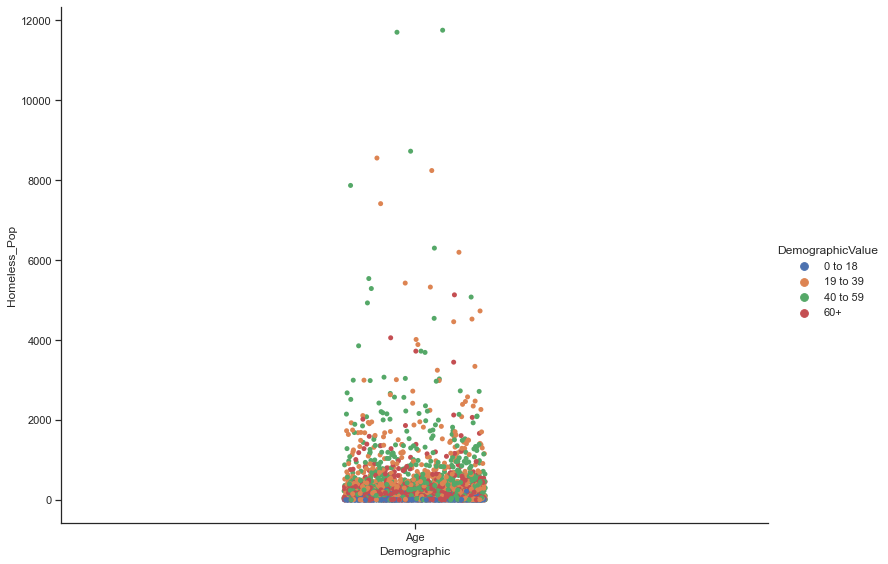

In [39]:
# demographics by age using # hue to highlight the range of ages
sns.set(style='ticks')
ageplot = sns.catplot(x='Demographic', y="Homeless_Pop", hue = 'DemographicValue', data = Ages, height = 8, aspect=11/8)

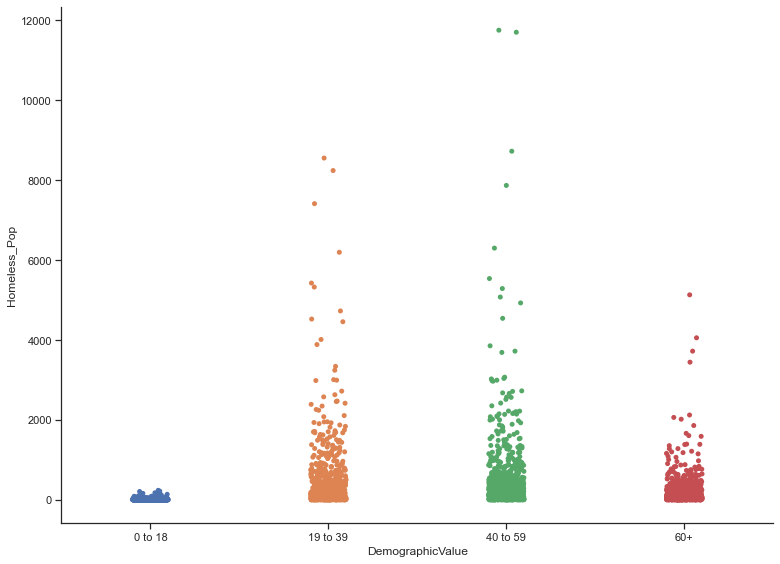

In [40]:
# demographics by age without the hue and ages separated. 
sns.set(style='ticks')
ageplot = sns.catplot(x='DemographicValue', y="Homeless_Pop", data = Ages, height = 8, aspect=11/8)

- The highest number of homeless visits occur in ages 40-59, followed by 19-39.  Ages 0-18 are the fewest encounters. 

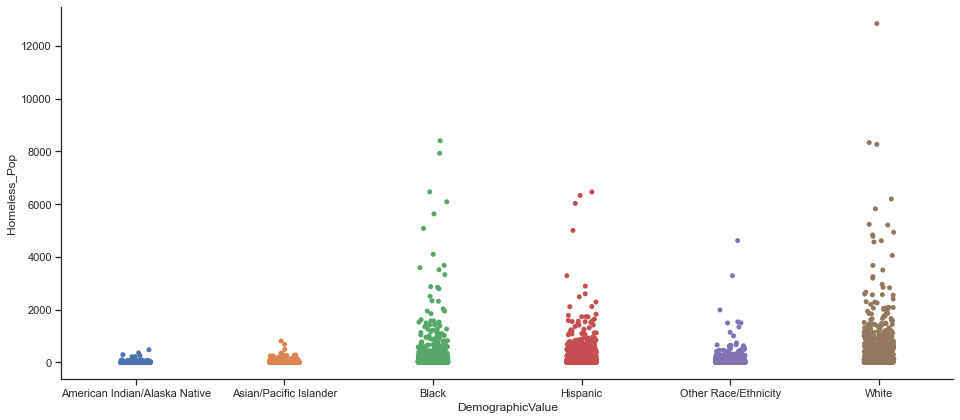

In [41]:
# demographics by race
sns.set(style='ticks')
raceplot = sns.catplot(x='DemographicValue', y="Homeless_Pop", data = Race, height = 6, aspect=45/20)

* The race with the highest enounters is White followed by Black.  American Indian/Alaska Native have the fewest encounters.


* It is important to be aware that these numbers reflect the total homeless encounters, rather than the percentage of the population.  A more accurate indicator of race would be to graph using the percentage of race per respective race population.

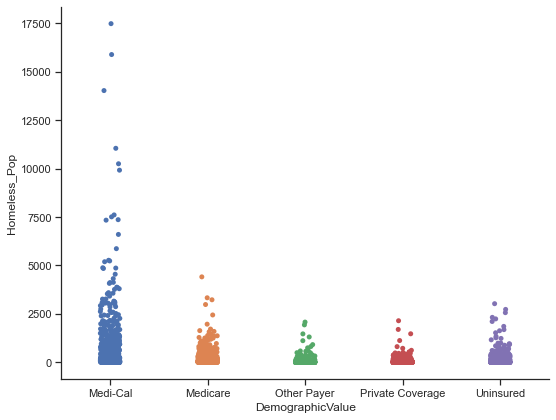

In [42]:
# demographics by payer
sns.set(style='ticks')
payer_plot = sns.catplot(x='DemographicValue', y="Homeless_Pop", data = Payer, height = 6, aspect=11.5/8.75)

* Most of the homeless encounters go through Medi-Cal, followed by Medicare.  Other payer or private coverage were the fewest encounters. 

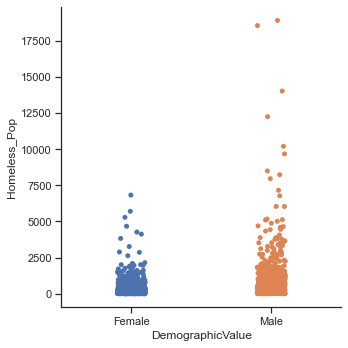

In [43]:
# demographics by gender
sns.set(style='ticks')
Gender_plot = sns.catplot(x='DemographicValue', y="Homeless_Pop", data = Gender)

* Men are more likely to have a hospital encounter.

# 7. Do Not Use - Goofing around - But want to keep this for future reference

In [44]:
# creating a dataset with only Age Values for the homeless population
age_encounter = Ages[['Demographic','DemographicValue', 'Homeless_Pop']].copy()


In [45]:
age_encounter.head()

,Demographic,DemographicValue,Homeless_Pop
0,Age,0 to 18,0
1,Age,19 to 39,42
2,Age,40 to 59,147
3,Age,60+,99
4,Age,0 to 18,5


In [46]:
# checking correlation with new age df
age_encounter.corr()

,Homeless_Pop
Homeless_Pop,1.0


In [47]:
# creating new dataframe to add dummy variables.
getdummy = age_encounter.copy()

In [48]:
# Creating dummy ariables for Demogrpahic Value (Ages) due to it being categorical data
getdummy = pd.get_dummies(getdummy, columns = ['Demographic','DemographicValue'])

In [49]:
# viewing output
getdummy.head()

,Homeless_Pop,Demographic_Age,DemographicValue_0 to 18,DemographicValue_19 to 39,DemographicValue_40 to 59,DemographicValue_60+
0,0,1,1,0,0,0
1,42,1,0,1,0,0
2,147,1,0,0,1,0
3,99,1,0,0,0,1
4,5,1,1,0,0,0


In [50]:
# create correlation matrix with new dataframe and dummy variables. 
getdummy.corr()

,Homeless_Pop,Demographic_Age,DemographicValue_0 to 18,DemographicValue_19 to 39,DemographicValue_40 to 59,DemographicValue_60+
Homeless_Pop,1.000000,NaN,-0.230698,0.112810,0.185718,-0.067829
Demographic_Age,NaN,NaN,NaN,NaN,NaN,NaN
DemographicValue_0 to 18,-0.230698,NaN,1.000000,-0.333333,-0.333333,-0.333333
DemographicValue_19 to 39,0.112810,NaN,-0.333333,1.000000,-0.333333,-0.333333
DemographicValue_40 to 59,0.185718,NaN,-0.333333,-0.333333,1.000000,-0.333333
DemographicValue_60+,-0.067829,NaN,-0.333333,-0.333333,-0.333333,1.000000


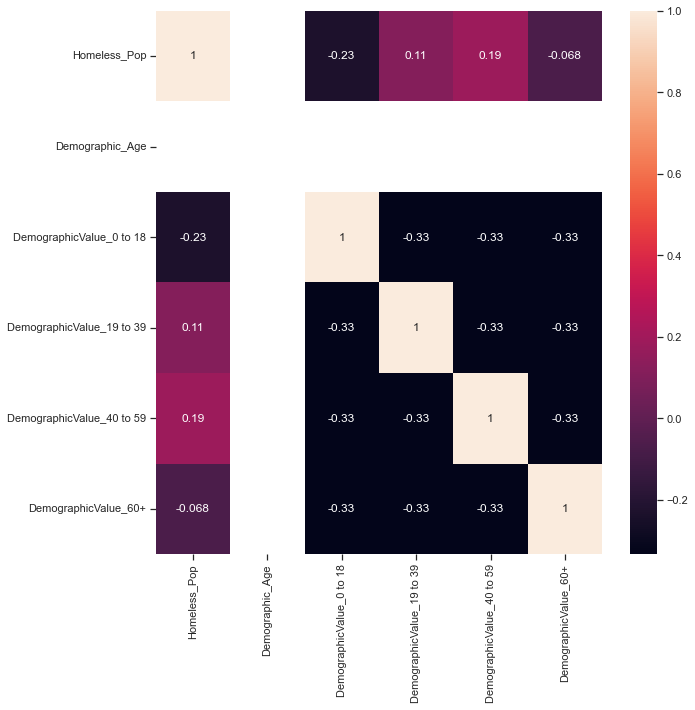

In [51]:
# create a correlation heatmap with dummy variables
# create subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# create the correlation heatmap
dummy = sns.heatmap(getdummy.corr(), annot = True, ax=ax)

## 8.  Hypothesis

1. Men are more likely to go to the hospital than women. 


2. Homeless are more likely to visit the ER than Inpatient Hospitalization


3. There is a significant difference in Homeless Age Groups that have hospital Encounters.  Aged 40-59 is most likely to have a hospital encounter

## Exporting DataFrame

In [52]:
# exporting the county sum
df3.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.2_CountySum.csv')

In [54]:
# exporting new dataframe
df2.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.2_Homeless_Correlations.csv')